<h1 align='center'>
    Modelo Cinemático Inverso do Manipulador PUMA 260
    <br>  
    (Método Analítico)
<h1>

<div align="center">
    <img src="puma260.png">
</div>

In [1]:
from FKM import *

### Definição da Tabela de Denavit Hartenberg:

In [2]:
puma = Robot((
    [theta1, 13, 0, rad(-90)],
    [theta2, d1, 8, 0],
    [theta3+rad(90), 0, 0, rad(90)],
    [theta4, 8, 0, rad(-90)],
    [theta5-rad(90), 0, 0, rad(90)],
    [theta6, d2, 0, 0]
))

### Modelo Cinemático Direto:

In [3]:
H06 = puma.HTM(0, 6)

H06

⎡-c₆⋅(-c₁⋅c₂₃⋅c₅ + s₅⋅(c₁⋅c₄⋅s₂₃ + s₁⋅s₄)) - s₆⋅(-c₁⋅s₂₃⋅s₄ + c₄⋅s₁)  -c₆⋅(-c₁
⎢                                                                             
⎢-c₆⋅(-c₂₃⋅c₅⋅s₁ + s₅⋅(-c₁⋅s₄ + c₄⋅s₁⋅s₂₃)) + s₆⋅(c₁⋅c₄ + s₁⋅s₂₃⋅s₄)  c₆⋅(c₁⋅c
⎢                                                                             
⎢                c₂₃⋅s₄⋅s₆ - c₆⋅(c₂₃⋅c₄⋅s₅ + c₅⋅s₂₃)                          
⎢                                                                             
⎣                                 0                                           

⋅s₂₃⋅s₄ + c₄⋅s₁) + s₆⋅(-c₁⋅c₂₃⋅c₅ + s₅⋅(c₁⋅c₄⋅s₂₃ + s₁⋅s₄))  c₁⋅c₂₃⋅s₅ + c₅⋅(c
                                                                              
₄ + s₁⋅s₂₃⋅s₄) + s₆⋅(-c₂₃⋅c₅⋅s₁ + s₅⋅(-c₁⋅s₄ + c₄⋅s₁⋅s₂₃))   c₂₃⋅s₁⋅s₅ + c₅⋅(-
                                                                              
        c₂₃⋅c₆⋅s₄ + s₆⋅(c₂₃⋅c₄⋅s₅ + c₅⋅s₂₃)                          c₂₃⋅c₄⋅c₅
                                                   

### Cinemática inversa de posição:

##### Partindo da matriz homogênea do MCD: $$H_6^0 = \left[ \begin{matrix} R_6^0 & o_6^0\\ 0 & 1 \end{matrix} \right], $$ e  e de uma pose alvo desejada (target): $$H_T = \left[ \begin{matrix}  R_T & o_T\\ 0 & 1 \end{matrix} \right]$$ Desacoplamento cinemático: $$o_6^0 = o_c^0 + d_2R_6^0k ~~\implies~~ o_c^0 = o_6^0 - d_2R_6^0k,$$ analogamente: $$o_T = o_c^0 + d_2R_Tk ~~\implies~~ o_c^0 = o_T - d_2R_Tk,$$ portanto: $$o_c^0 = \left[ \begin{matrix} o_x - d_2r_{13}\\ o_y - d_2r_{23}\\ o_z\ - d_2r_{33}  \end{matrix} \right] = \left[ \begin{matrix} X_T - d_2r_{T_{13}}\\ Y_T - d_2r_{T_{23}}\\ Z_T - d_2r_{T_{33}} \end{matrix} \right]$$

In [4]:
oc = simplify(H06[:3,3] - d2*H06[:3, 2])

oc

⎡8⋅c₁⋅c₂ + 8⋅c₁⋅c₂₃ - d₁⋅s₁⎤
⎢                          ⎥
⎢c₁⋅d₁ + 8⋅c₂⋅s₁ + 8⋅c₂₃⋅s₁⎥
⎢                          ⎥
⎣    -8⋅s₂ - 8⋅s₂₃ + 13    ⎦

#####  $$\text{Assim, obtem-se os três primeiros ângulos } \theta_1,~\theta_2~e~\theta_3 \text{, resolvendo-se o sistema não linear:}$$

$$8c_1c_2+8c_1c_{23}-d_1s_1 ~~=~~ X_T - d_2r_{T_{13}}$$

$$c_1d_1+8c_2s_1+8c_{23}s_1 ~~=~~ Y_T - d_2r_{T_{23}}$$

$$-8s_2-8s_{23}+13 ~~=~~ Z_T - d_2r_{T_{33}}$$

### Cinemática Inversa de Orientação:

##### Adotando: $$R_6^3 = \left( R_3^0 \right)^{-1}R_6^0 = \left( R_3^0 \right)^{T}R_6^0$$ e: $$R_T = R_3^0(\theta_1, \theta_2, \theta_3)R_6^3(\theta_1, \theta_2, \theta_3)$$

##### $$\text{A partir do modelo cinemático direto (Denavit-Hartenberg): } R_3^0 = A_1A_2A_3$$

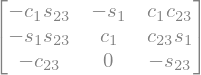

In [5]:
R03 = puma.HTM(0, 3)[:3, :3]

R03

##### $$\text{A partir do modelo cinemático direto (Denavit-Hartenberg): } R_6^3 = A_4A_5A_6$$

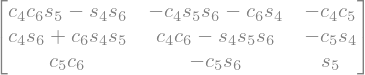

In [13]:
R36 = puma.HTM(3, 6)[:3, :3]

R36

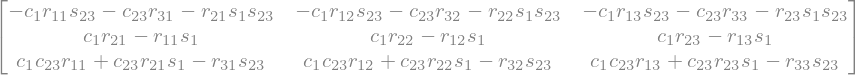

In [14]:
r11= Symbol('r_{11}')
r12= Symbol('r_{12}')
r13= Symbol('r_{13}')
r21= Symbol('r_{21}')
r22= Symbol('r_{22}')
r23= Symbol('r_{23}')
r31= Symbol('r_{31}')
r32= Symbol('r_{32}')
r33= Symbol('r_{33}')
RT = Matrix([
    [r11, r12, r13],
    [r21, r22, r23],
    [r31, r32, r33]
])

M = R03.T@RT

M

##### Assim, associa-se: $$ \left[\begin{matrix}c_{4} c_{6} s_{5} - s_{4} s_{6} & - c_{4} s_{5} s_{6} - c_{6} s_{4} & - c_{4} c_{5}\\c_{4} s_{6} + c_{6} s_{4} s_{5} & c_{4} c_{6} - s_{4} s_{5} s_{6} & - c_{5} s_{4}\\c_{5} c_{6} & - c_{5} s_{6} & s_{5}\end{matrix}\right] = \left[\begin{matrix}- c_{1} r_{11} s_{23} - c_{23} r_{31} - r_{21} s_{1} s_{23} & - c_{1} r_{12} s_{23} - c_{23} r_{32} - r_{22} s_{1} s_{23} & - c_{1} r_{13} s_{23} - c_{23} r_{33} - r_{23} s_{1} s_{23}\\c_{1} r_{21} - r_{11} s_{1} & c_{1} r_{22} - r_{12} s_{1} & c_{1} r_{23} - r_{13} s_{1}\\c_{1} c_{23} r_{11} + c_{23} r_{21} s_{1} - r_{31} s_{23} & c_{1} c_{23} r_{12} + c_{23} r_{22} s_{1} - r_{32} s_{23} & c_{1} c_{23} r_{13} + c_{23} r_{23} s_{1} - r_{33} s_{23}\end{matrix}\right],$$ $$\text{onde os valores de } \theta_1, \theta_2, \theta_3 \text{ são conhecidos, da MCI de posição.} $$

#####  $$\text{Assim, obtem-se os três últimos ângulos } \theta_4,~\theta_5~e~\theta_6 \text{, resolvendo-se o sistema:}$$ $$s_5 = c_1c_{23}r_{13}+c_{23}r_{23}s_1-r_{33}s_{23}$$ $$c_5c_6 = c_1c_{23}r_{11}+c_{23}r_{21}s_1-r_{31}s_{23} ~~\implies~~ c_6 = \frac{c_1c_{23}r_{11}+c_{23}r_{21}s_1-r_{31}s_{23}}{c_5}$$ $$-c_5s_4 = c_1r_{23}-r_{13}s_1 ~~\implies~~ s_4 = \frac{r_{13}s_1-c_1r_{23}}{c_5}$$ onde os elementos associados foram escolhidos por questão de simplicidade, já que, qualquer associação que fosse linearmente independente poderia ser utilizada.

##### Logo, as soluções tornam-se: $$\theta_5 = \pm atan2(s_5, ~\sqrt{1-s_5^2})$$ $$\theta_6 = \pm atan2(\sqrt{1-c_6^2}, ~c_6)$$ $$\theta_4 = \pm atan2(s_4, ~\sqrt{1-s_4^2})$$